# Основы программирования и анализа данных на Python

# Лекция №11. Поиск данных и машинное обучение

Любая задача машинного обучения состоит из следующих шагов:

1. Поиск/сбор данных
2. Подготовка/предобработка данных/устранение пропусков
3. Визуализация различных зависимостей в данных
3. Выбор модели машинного обучения
4. Обучение модели
5. Оценка модели
6. Подбор параметров модели (гиперпараметров)/оптимизация модели
7. Предсказание

Целью нашего курса было ознакомить вас с основами Python и основами анализа данных при помощи Python. Полученные знания понадобятся вам при освоении более глубоких курсов, которые уже будут захватывать темы, связанные с машинным обучением и искусственным интеллектом.

В нашем курсе очень подробно были рассмотрены темы про подготовку, предобработку и визуализацию данных - это пункты 2 и 3 в списке выше. На этой лекции мы рассмотрим очень важный пункт 1 и немного затронем пункты 4-8.

Пункты 4-8 относятся к машинному обучению и подробно будут разбираться в последующих курсах, который начнутся в следующем году.

## Поиск и сбор данных

Поиск и сбор данных $-$ это одна из самых важных подзадач в машинном обучении, которая возникает практически всегда. Хорошо, когда данные уже предоставлены кем-то, а также подготовлены: очищены, удалены ошибочные данные, устранены пропуски.

Но это к сожалению бывает не всегда. Часто данные сильно зашумлены, часть данных представлена в одном формате, часть в другом. Данные могут содержать большое количество пропусков, и честно говоря, вообще быть не пригодными для какого-либо анализа.

Но что делать, когда подходящих данных нет под рукой?

О том как решать проблемы, описанные выше, мы поговорим в первой части нашей сегодняшней лекции.




### Поиск готовых датасетов

Первое, что нужно попробовать, когда нужных данных для анализа у вас нет - поискать данные в сети Интернет. Рассмотрим популярные источники данных и примеры датасетов.

#### Kaggle datasets

[Kaggle](https://ru.wikipedia.org/wiki/Kaggle) - платформа для организации соревнований по машинному обучению и анализу данных, а также социальная сеть специалистов в сфере Data Science. C марта 2017 года инадлежит корпорации Google.

Соревнования на платформе Kaggle бывают учебные, а бывают такие, за которые можно получить денежное вознаграждение. Список соревнований можно посмотреть, пройдя по [ссылке](https://www.kaggle.com/competitions).

На странице с соревнованием пользователи платформы могут загружать свои *Jupyter notebook*'и, называемые *kernel*'ами. В этих ноутбуках они проводят свое исследование, делятся наработками с другими людьми.

Но в данной лекции нас в первую очередь интересуют [датасеты](https://www.kaggle.com/datasets) с платформы Kaggle. Их можно скачать вручную, но это не очень удобно, так как если вы работаете в *Google Colab*, вам придется постоянно вручную их подгружать.

Воспользуемся специальной библиотекой [Kaggle API](https://github.com/Kaggle/kaggle-api) для скачивания датасетов с платформы Kaggle. Детально про библиотеку можно прочитать по [ссылке](https://colab.research.google.com/github/corrieann/kaggle/blob/master/kaggle_api_in_colab.ipynb#scrollTo=DIf2PtekjPtY).

---



Подключим также дополнительную библиотеку `google.colab`, чтобы удобно можно было очищать вывод после выполнения команд.

In [ ]:
from google.colab import output

Установим библиотеку Kaggle API

In [ ]:
!pip install kaggle
output.clear()

Далее нам нужно зарегистрироваться на платформе Kaggle и скачать токен (специальная последовательность букв и цифр), который является уникальным для каждого пользователям и по сути заменяет пару (логин, пароль). Именно токен позволит нам программным образом взаимодействовать с платформой Kaggle.



Чтобы получить токен, необходимо:
1. Авторизоваться в своем аккаунте на платформе *Kaggle*;
2. Нажать в правом верхнем углу на иконку своего профиля;
3. Перейти во вкладку *Account*;
4. Найти раздел *API*;
5. Нажать *Create New API Token*;
6. Скачать и сохранить файл с токеном: `kaggle.json`.

Далее загрузите файл `kaggle.json` в следующей ячейке:

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
  
# Then move kaggle.json into the folder where the API expects to find it.
!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User uploaded file "kaggle.json" with length 62 bytes


Теперь мы можем распечатать список всех соревнований:



In [ ]:
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         93           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         86           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge        942           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        143           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1683            True  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14664           False  
house-pr

А чтобы скачать интересующий нас датасет, нужно найти название соревнования на странице с описанием соревнования.

Пример [датасета](https://www.kaggle.com/c/competitive-data-science-predict-future-sales/data?select=shops.csv).

Описание данных и название соревнования:
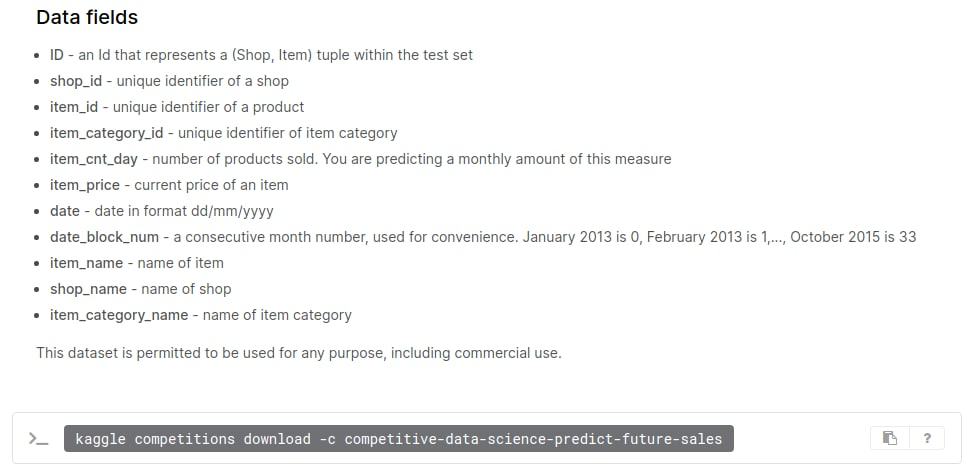



In [ ]:
!kaggle competitions download -c competitive-data-science-predict-future-sales
output.clear()

Убедимся, что все файлы скачались:

In [ ]:
!ls -la

total 15924
drwxr-xr-x 1 root root     4096 Dec 15 10:54 .
drwxr-xr-x 1 root root     4096 Dec 15 08:06 ..
drwxr-xr-x 4 root root     4096 Dec  3 14:33 .config
-rw-r--r-- 1 root root     3573 Dec 15 10:54 item_categories.csv
-rw-r--r-- 1 root root   376550 Dec 15 10:54 items.csv.zip
-rw-r--r-- 1 root root   409567 Dec 15 08:06 price_demand_data.csv
-rw-r--r-- 1 root root 13913093 Dec 15 10:54 sales_train.csv.zip
drwxr-xr-x 1 root root     4096 Dec  3 14:33 sample_data
-rw-r--r-- 1 root root   479055 Dec 15 10:54 sample_submission.csv.zip
-rw-r--r-- 1 root root     2977 Dec 15 10:54 shops.csv
-rw-r--r-- 1 root root  1073862 Dec 15 10:54 test.csv.zip
-rw-r--r-- 1 root root    21640 Dec 15 08:06 weather_data.csv


Большие файлы могут быть представлены в виде архива, распакуем их:

In [ ]:
!unzip items.csv.zip
!unzip sales_train.csv.zip
!unzip sample_submission.csv.zip
!unzip test.csv.zip
output.clear()

Далее с *csv* файлами можно работать уже знакомым вам способом: при помощи библиотеки  *Pandas*:

In [ ]:
import pandas as pd

items_df = pd.read_csv("items.csv")
item_categories_df = pd.read_csv("item_categories.csv")
shops_df = pd.read_csv("shops.csv")
sales_df = pd.read_csv("sales_train.csv")

display(items_df.head())
display(item_categories_df.head())
display(shops_df.head())
display(sales_df.head())

,item_name,item_id,item_category_id
0,! ВО ВЛАСТИ НАВАЖДЕНИЯ (ПЛАСТ.) D,0,40
1,!ABBYY FineReader 12 Professional Edition Full...,1,76
2,***В ЛУЧАХ СЛАВЫ (UNV) D,2,40
3,***ГОЛУБАЯ ВОЛНА (Univ) D,3,40
4,***КОРОБКА (СТЕКЛО) D,4,40


,item_category_name,item_category_id
0,PC - Гарнитуры/Наушники,0
1,Аксессуары - PS2,1
2,Аксессуары - PS3,2
3,Аксессуары - PS4,3
4,Аксессуары - PSP,4


,shop_name,shop_id
0,"!Якутск Орджоникидзе, 56 фран",0
1,"!Якутск ТЦ ""Центральный"" фран",1
2,"Адыгея ТЦ ""Мега""",2
3,"Балашиха ТРК ""Октябрь-Киномир""",3
4,"Волжский ТЦ ""Волга Молл""",4


,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0


Теперь перейдем к рассмотрению популярных датасетов.

#### ImageNet


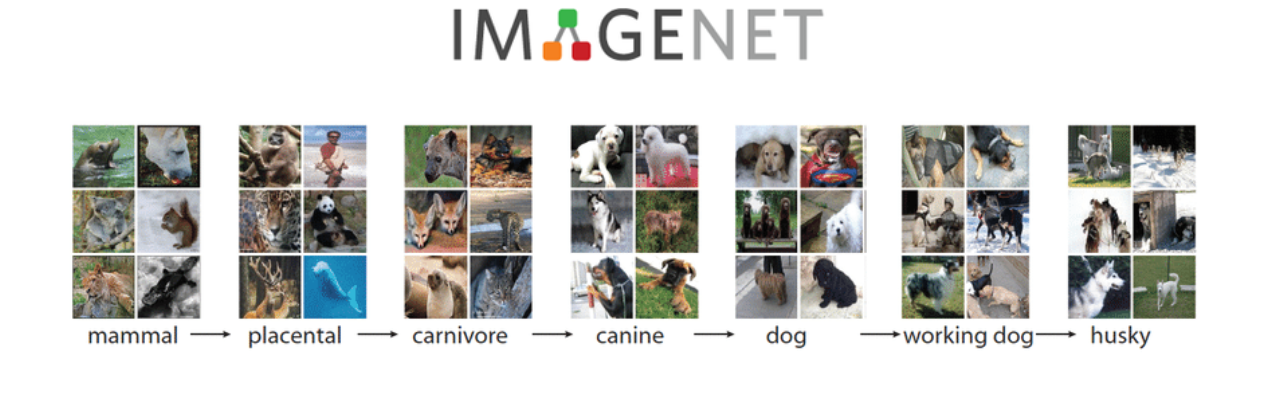

[Ссылка_1](https://image-net.org/download) и [ссылка_2](https://paperswithcode.com/dataset/imagenet)

База данных Imagenet - является большой базой данных аннотированных изображений. Аннотация изображений происходит путем краудсорсинга сообществом. Из-за этого достигается большое количество размеченных данных.

Особенность данного набора данных - про каждую картинку известно несколько фактов вида: классы объекта и прямоугольники, описывающие объекты - bounding box. Также данные содержат индекс по типам объектов, которые есть на изображениях. Таким образом, на данном датасете можно обучать алгоритм для распознавания объектов конкретной классов: машина, человек, велосипед, мотоцикл и т.д.

Датасет содержит более 14 млн. изображений, разбитых на более чем 21 тыс. категорию.


Пример картинки из ImageNet

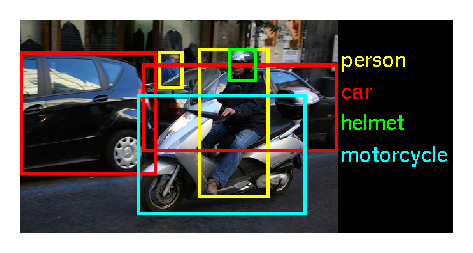

#### COCO

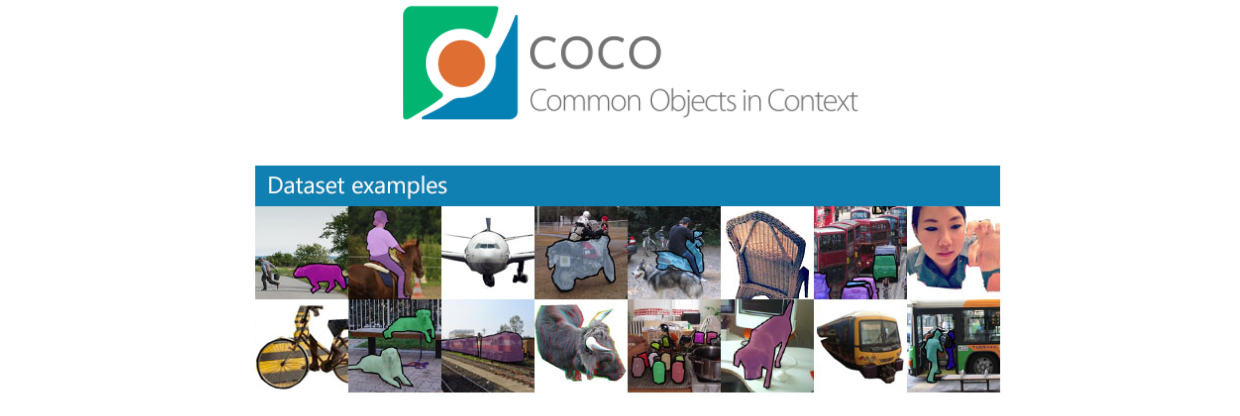

Используется для обучения моделей, решающих задачи классификации, сегментации и  детектирования. В нем намного меньше категорий объектов чем в ImageNet, но присутствует разметка по bounding box и маскам - специальное изображение, на котором отмечены пиксели, принадлежащие только конкретному объекту.

[Ссылка](http://cocodataset.org)

Microsoft COCO (англ. Common Objects in Context) - состоит из более чем 330000 изображений с более чем 1.5 милионов объектов на них. Примеры изображений приведены на рисунке выше. Все объекты находятся в их естественном окружении (контексте), поэтому датасет и получил такое название. На изображениях, как правило, присутствуют объекты разных классов.

#### CIFAR-10

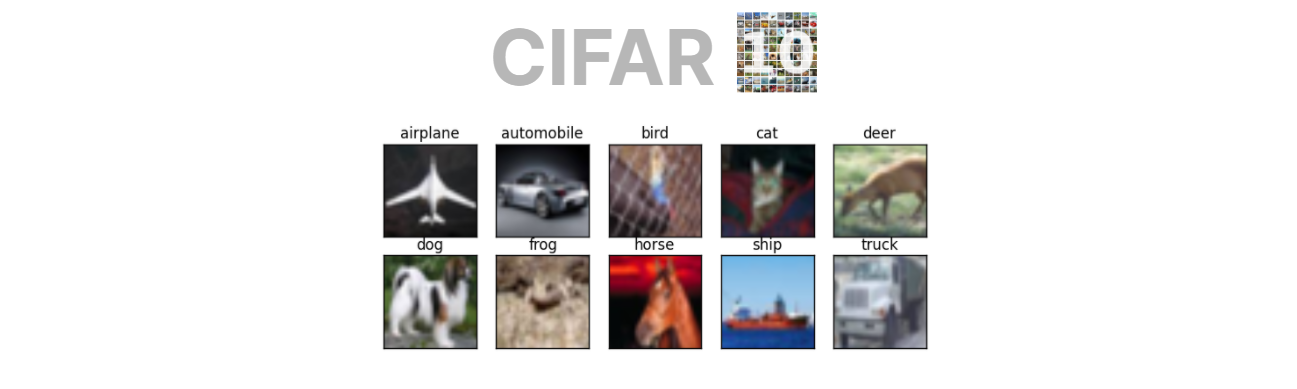

Изображения в низком разрешении: 32х32, 10 классов, на одной картинке один объект.

[Ссылка](https://www.cs.toronto.edu/~kriz/cifar.html)



CIFAR-10 (Canadian Institute For Advanced Research) — еще один набор изображений, который обычно используется для тестирование алгоритмов машинного обучения. Он содержит 60 000 цветных картинок размером 32х32 пикселя, размеченных в один из десяти классов: самолеты, автомобили, коты, олени, собаки, лягушки, лошади, корабли и грузовики. В наборе данных по 6000 картинок каждого класса, примеры некоторых из них приведены на рисунке выше.

#### MNIST

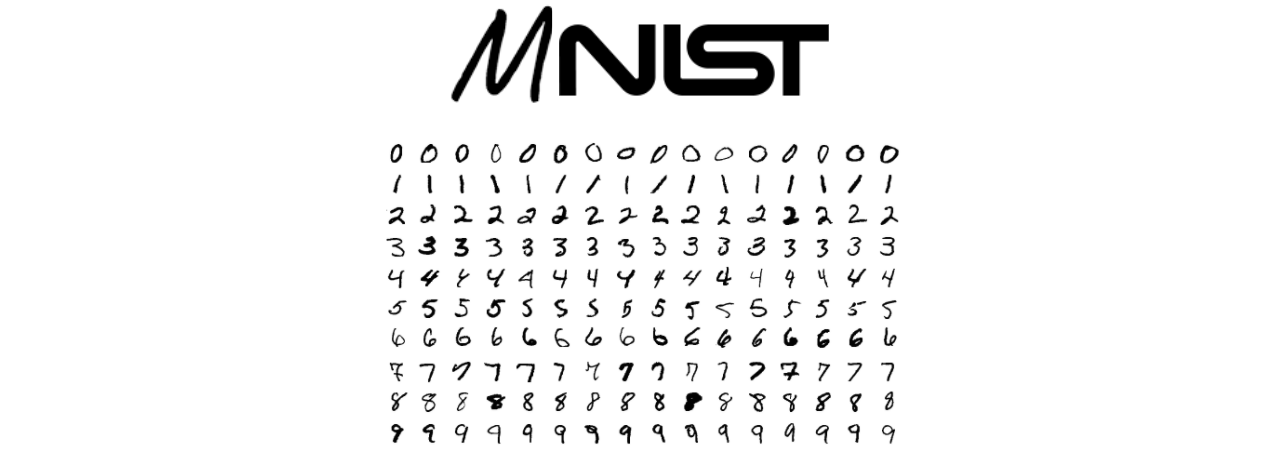

База данных рукописных цифр

[Ссылка](http://yann.lecun.com/exdb/mnist/)



Набор данных MNIST - большой набор картинок с рукописными цифрами, также часто используемый для тестирования различных алгоритмов распознавания образов. Он содержит порядка 60 000 тренировочных и 10 000 проверочных объектов, помеченных на принадлежность одному из десяти классов в зависимости от того, какая цифра изображена на картинке.

Он содержит черно-белые картинки размера 28x28 пикселей.

Датасеты ImageNet и COCO являются исследовательскими. Это означает, что на этих датасетах соревнуются, проверяют гипотезы и качество работы новых моделей. Для этих датасетов есть много примеров в сети Интернет.

CIFAR10/100 и MNIST - это учебные датасеты. В них изображения размечены по нескольким классам. Чтобы загрузка данных и обучение проходили быстро, картинки имеют небольшое разрешение и количество классов невелико.

И авторы статей, посвященных разработке новых нейросетевых моделей, достаточно часто приводят результаты работы своих моделей на этих датасетах.

Еще один источник датасетов: [Google Dataset Search](https://datasetsearch.research.google.com/).

### Самостоятельная подготовка датасета

В том случае, когда не удается найти готовые датасеты в сети Интернет, приходится самостоятельно собирать данные. Для этого нужно сначала определиться с источниками данных, обычно это сайты в сети Интернет, затем выбрать инструмент для извлечения/скачивания данных. В этом разделе мы рассмотрим популярные инструменты для скачивания (парсинга) данных с сайтов.

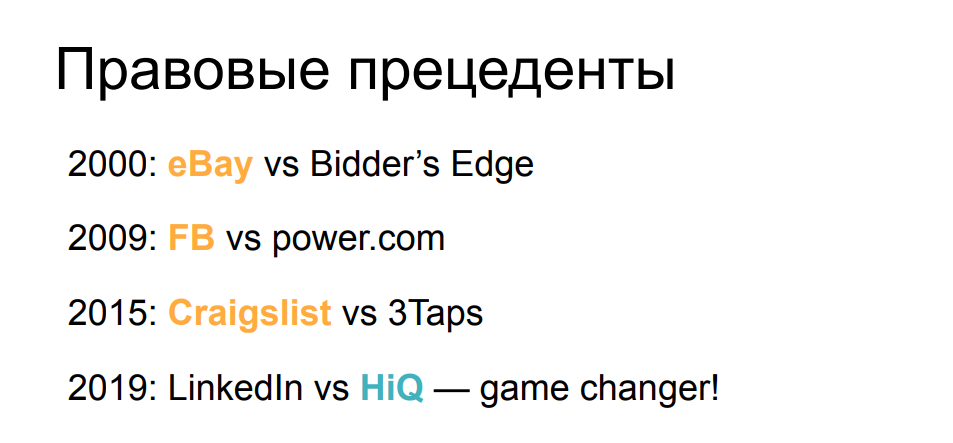

Более детально про парсинг можно прочитать по [ссылке](https://habr.com/ru/company/qrator/blog/513014/).

Рассмотрим основные инструменты для парсинга:
- Python Requests
- BeautifulSoup
- Selenium

#### Python requests

[Документация](http://docs.python-requests.org/) по библиотеке requests.

In [ ]:
import requests

Скачаем рейтинг ВУЗов России. [Ссылка](https://raex-a.ru/rankings/vuz/vuz_best_2021#2)

In [ ]:
url = "https://raex-a.ru/rankings/vuz/vuz_best_2021"
page = requests.get(
    url,
    headers={
        'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10.14; rv:82.0) Gecko/20100101 Firefox/82.0', 
    },
)

page.status_code

200

In [ ]:
page.text

'\n<!DOCTYPE html><head>\n    <meta http-equiv="content-type" content="text/html; charset=UTF-8" >\n<meta http-equiv="X-UA-Compatible" content="IE=edge" >\n<meta name="description" content="Рейтинг лучших вузов России RAEX-100, 2021 год" >\n<meta name="viewport" content="width=device-width, initial-scale=1" >\n                \n                \n                \n\n    <title>Рейтинг лучших вузов России RAEX-100, 2021 год</title>\n    <link href="/static/css/ra5_index.css" media="screen" rel="stylesheet" type="text/css" >\n    <script type="text/javascript" src="/static/js/jquery-1.11.2.min.js"></script>\n<script type="text/javascript" src="/static/js/jquery-ui-1.12.1/jquery-ui.min.js"></script>\n<meta name="yandex-verification" content="0c05c594dbcf6e26" />\n<meta property="og:image" content="/static/images/raex_fbn.jpg" />\n<meta property="og:image:type" content="image/jpeg" />\n<meta property="og:image:width" content="200" />\n<meta property="og:image:height" content="200" />\n<link

#### BeautufulSoup

[Документация](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) по библиотеке Beautiful Soup.

In [ ]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(page.text, 'html.parser')
table = soup.find('table', attrs={'class':'ranking'})
table_rows = table.find_all('tr')

res = []
for tr in table_rows:
    td = tr.find_all('td')
    row = [tr.text.strip() for tr in td if tr.text.strip()]
    if row:
        res.append(row)

df = pd.DataFrame(res[1:], columns = res[0])
df

,"Место, 2021 год","Место, 2020 год",Название,Рейтинговый функционал (балл),"Условия для получения качественного образования, ранг","Уровень востребованности выпускников работодателями, ранг","Уровень научно-исследовательской деятельности, ранг"
0,1,1,Московский государственный университет имени М...,"4,6645",1,1,1
1,2,2,Московский физико-технический институт (национ...,"4,6108",2,9,2
2,3,3,Национальный исследовательский ядерный универс...,"4,5793",5,5,4
3,4,4,Санкт-Петербургский государственный университет,"4,4828",3,11,9
4,5,5,"Национальный исследовательский университет ""Вы...","4,4764",6,4,12
...,...,...,...,...,...,...,...
95,96,93,Тихоокеанский государственный университет,"1,9805",71,100,129
96,97,91,Российский новый университет (РосНОУ),"1,9690",69,118,105
97,98,85,Юго-Западный государственный университет,"1,9497",119,105,55
98,99,-,Московский политехнический университет,"1,9356",79,104,138


#### Headless browsers. Selenium

In [ ]:
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
output.clear()

Рассмотрим простой пример с заполнением формы на [сайте](http://suninjuly.github.io/math.html). Пример взят с [курса](https://stepik.org/course/575/promo) "Автоматизация тестирования с помощью Selenium и Python" на платформе Stepik.

Рассмотрим базовую реализацию, написанную специально для лекции.

In [ ]:
import math
import time
from selenium import webdriver
from selenium.webdriver.common.by import By


def calc(x):
    return str(math.log(abs(12*math.sin(int(x)))))

def robot_captcha():
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument('--headless')
    chrome_options.add_argument('--no-sandbox')
    chrome_options.add_argument('--disable-dev-shm-usage')
    browser = webdriver.Chrome('chromedriver', options=chrome_options)

    try:
        link = "http://suninjuly.github.io/math.html"
        
        browser.get(link)

        browser.get_screenshot_as_file("visible_screen_example_01.png") # Take screenshot

        x_elem = browser.find_element(By.ID, "input_value")
        x = int(x_elem.text)
        y = calc(x)

        answer = browser.find_element(By.ID, "answer")
        answer.send_keys(y)

        checkbox = browser.find_element(By.ID, "robotCheckbox")
        checkbox.click()

        radiobutton = browser.find_element(By.ID, "robotsRule")
        radiobutton.click()
        
        button = browser.find_element(By.CSS_SELECTOR, "button.btn")
        button.click()

        print("SUCCESS")

    finally:
        time.sleep(5)
        browser.quit()

robot_captcha()

SUCCESS


Посмотрим на сохраненный скриншот:

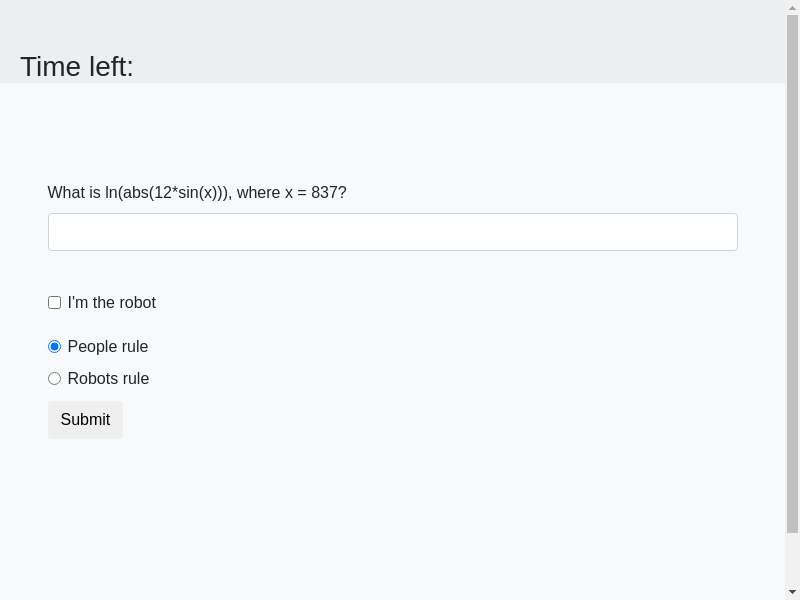

In [ ]:
from IPython.display import Image
Image('/content/visible_screen_example_01.png')

Теперь рассмотрим точную копию [Google формы](https://docs.google.com/forms/d/e/1FAIpQLSeyv5CmL1rjKBq6HEoJgVsHbli_JAIcxmmY-3Mwng26ZQg0NQ/viewform), которую вы заполняли после объявления результатов решения контестов.

Заполним Google форму, используя библиотеку Selenium.


In [ ]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from selenium.webdriver.common.by import By

# Настройка браузера
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

# Создаем объект webdriver.Chrome для работы в Chrome
browser = webdriver.Chrome('chromedriver',options=chrome_options)
url = "https://docs.google.com/forms/d/e/1FAIpQLSeyv5CmL1rjKBq6HEoJgVsHbli_JAIcxmmY-3Mwng26ZQg0NQ/viewform"

# Заходим на страницу с Google-формой
browser.get(url)

# Вопрос №1 - ФИО
# Все поля, которые нужно заполнить имеют одинаковый class_name в HTML странице,
# поэтому результат выполнения browser.find_elements_by_class_name вернет
# 5 объектов, которые соответствуют полям.
textboxes = browser.find_elements_by_class_name("exportInput")
print(f"Количество вопросов: {len(textboxes)}")
textboxes[0].send_keys("Гвидо ван Россум")

# Вопрос №2 - Факультет
textboxes[1].send_keys("Не из МГУ")

# Вопрос №3 - Укажите с вердиктом какого контеста вы не согласны? (если таких контестов несколько, перечислите через запятую их номера)
textboxes[2].send_keys("8,9")

# Вопрос №4 - Как с вами связаться? (email или telegram)
textboxes[3].send_keys("https://gvanrossum.github.io//")

# Вопрос №5 - Вопросы? Например: не нашел себя в таблице, хотя записывался
textboxes[4].send_keys("Не нашел себя в таблице, хотя записывался")

browser.get_screenshot_as_file("visible_screen_example_02-1.png") # Take screenshot

# После заполнения всех полей нажимаем кнопку 'Submit'
button = browser.find_element_by_xpath("//span[contains(text(),'Verzenden')]") # Change to Verzenden
button.click()

browser.get_screenshot_as_file("visible_screen_example_02-2.png") # Take screenshot

browser.quit()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: DeprecationWarning: find_elements_by_* commands are deprecated. Please use find_elements() instead


Количество вопросов: 5


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:42: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead


Как узнать идентификатор, который мы использовали в методе `browser.find_elements_by_class_name`?:

1. Открыть страницу с Google формой
2. Открыть developer tools - Ctrl+Shift+J
3. Перейти на вкладку Elements
4. Найти нужный элемент в HTML коде - придется постараться
5. Нажать на него правой кнопкой -> Copy -> выбрать Copy selector или Copy XPath
6. Полученный путь к элементу вставить в соответствующий метод:
    - `find_element_by_css_selector`
    - `find_elements_by_class_name`
    - `find_element_by_xpath`

Обратите внимание на то, что мы сохранили скриншоты, посмотрим их.

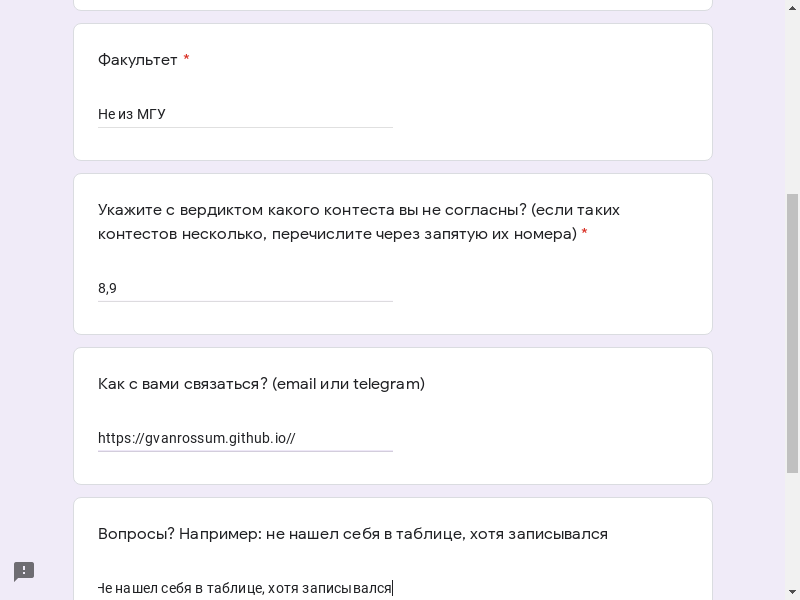

In [ ]:
from IPython.display import Image
Image('/content/visible_screen_example_02-1.png')

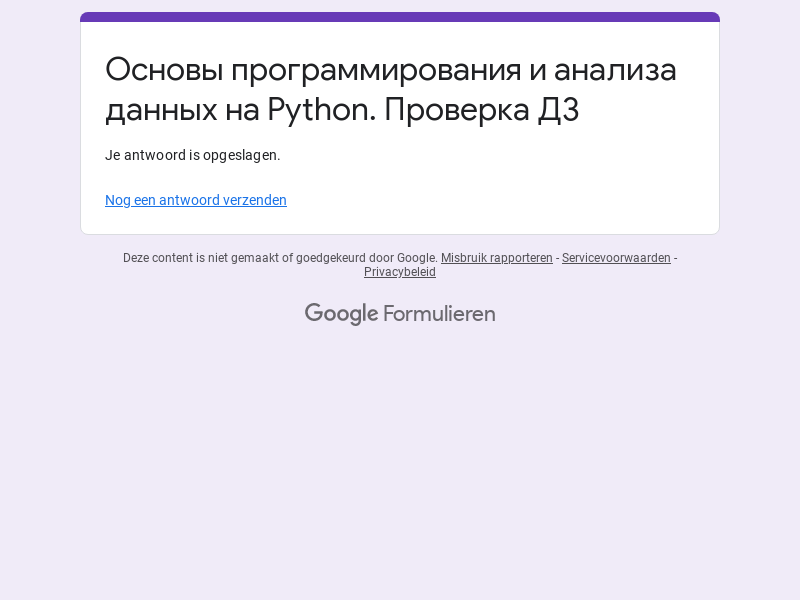

In [ ]:
from IPython.display import Image
Image('/content/visible_screen_example_02-2.png')

Результаты заполнения формы можно посмотреть в [Google таблице](https://docs.google.com/spreadsheets/d/1pNbVtbEYsAs8zg-_Mu9PTxeevp5gSmiVePStIvuEMo0/edit?usp=sharing).

In [ ]:
sheet_url = "https://docs.google.com/spreadsheets/d/1pNbVtbEYsAs8zg-_Mu9PTxeevp5gSmiVePStIvuEMo0/edit#gid=1145706634"
url = sheet_url.replace("/edit#gid=", "/export?format=csv&gid=")
url

'https://docs.google.com/spreadsheets/d/1pNbVtbEYsAs8zg-_Mu9PTxeevp5gSmiVePStIvuEMo0/export?format=csv&gid=1145706634'

In [ ]:
import pandas as pd

df = pd.read_csv(url)
df

,Timestamp,ФИО,Факультет,"Укажите с вердиктом какого контеста вы не согласны? (если таких контестов несколько, перечислите через запятую их номера)",Как с вами связаться? (email или telegram),"Вопросы? Например: не нашел себя в таблице, хотя записывался"


#### Готовые инструменты для парсинга: Kinopoisk

Рассмотрим библиотеку [Kinopoiskpy](https://github.com/ramusus/kinopoiskpy).

In [ ]:
!pip install kinopoiskpy
output.clear()

In [ ]:
from kinopoisk.person import Person

persons = Person.objects.search('john malkovich')
p = persons[0]

print(f"id: {p.id}, name: {p.name}, year_birth: {p.year_birth}, name_en: {p.name_en}")

id: 24508, name: Джон Малкович, year_birth: 1953, name_en: John Malkovich


In [ ]:
from kinopoisk.movie import Movie

movies = Movie.objects.search('Терминал')
m = movies[0]

print(f"id: {m.id}, year: {m.year}, title: {m.title}, title_en: {m.title_en}, runtime: {m.runtime}, rating: {m.rating}")

id: 6877, year: 2004, title: Терминал, title_en: The Terminal, runtime: 124, rating: 8.076


#### Готовые инструменты для парсинга: IMDB

Расмотрим библиотеку [imdbpy](https://github.com/alberanid/imdbpy).

In [ ]:
!pip install imdbpy
output.clear()

In [ ]:
from imdb import IMDb

ia = IMDb()
chart = ia.get_top250_movies()
chart[:10]

[<Movie id:0111161[http] title:_The Shawshank Redemption (1994)_>,
 <Movie id:0068646[http] title:_The Godfather (1972)_>,
 <Movie id:0071562[http] title:_The Godfather: Part II (1974)_>,
 <Movie id:0468569[http] title:_The Dark Knight (2008)_>,
 <Movie id:0050083[http] title:_12 Angry Men (1957)_>,
 <Movie id:0108052[http] title:_Schindler's List (1993)_>,
 <Movie id:0167260[http] title:_The Lord of the Rings: The Return of the King (2003)_>,
 <Movie id:0110912[http] title:_Pulp Fiction (1994)_>,
 <Movie id:0060196[http] title:_The Good, the Bad and the Ugly (1966)_>,
 <Movie id:0120737[http] title:_The Lord of the Rings: The Fellowship of the Ring (2001)_>]

In [ ]:
id = chart[0].getID()

In [ ]:
movie = ia.get_movie(id, info=['main'])
title = movie.get('localized title', '')
print(title)

movie = ia.get_movie(id, info=['taglines'])
taglines = movie.get('taglines', [])
print(taglines)

The Shawshank Redemption
['Fear can hold you prisoner. Hope can set you free.']


In [ ]:
movie = ia.get_movie(id, info=['plot'])
plots = movie.get('plot', [])

movie = ia.get_movie(id, info=['plot'])
synopsis = movie.get('synopsis')

print(plots)
print(synopsis)

['Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.', "Chronicles the experiences of a formerly successful banker as a prisoner in the gloomy jailhouse of Shawshank after being found guilty of a crime he did not commit. The film portrays the man's unique way of dealing with his new, torturous life; along the way he befriends a number of fellow prisoners, most notably a wise long-term inmate named Red.::J-S-Golden", 'After the murder of his wife, hotshot banker Andrew Dufresne is sent to Shawshank Prison, where the usual unpleasantness occurs. Over the years, he retains hope and eventually gains the respect of his fellow inmates, especially longtime convict "Red" Redding, a black marketeer, and becomes influential within the prison. Eventually, Andrew achieves his ends on his own terms.::Reid Gagle', "Andy Dufresne is sent to Shawshank Prison for the murder of his wife and her secret lover. He is very isolated and lone

In [ ]:
movie = ia.get_movie(id, info=['keywords'])
keywords = movie.get('keywords', [])
print(len(keywords))
keywords[::25]

377


['wrongful-imprisonment',
 'suicide-of-friend',
 'betting',
 'beach',
 'embezzlement',
 'prison-bus',
 'bus',
 'rape',
 'longing',
 'chess-game',
 'library-cart',
 'cafeteria',
 'sewer',
 'pet',
 'chess-set',
 'pie']

## Регулярные выражения

Онлайн отладчик регулярных выражений: https://regex101.com

Как задается регулярное выражение?

* `^` – символ начала строки;
* `$` – символ конца строки;
* `\b` – граница слова;
* `\d` – любая цифра (`[0-9]`);
* `\w` – любая цифра, любая латинская буква или символ `_` (`[0-9a-zA-Z_]`);
* `\s` – любой пробельный символ;
* `[...]` – любой из перечисленных символов, например, `[12abd]` (или диапазоны, см. выше);
* `[^...]` – любой символ кроме перечисленных.


In [ ]:
import re

In [ ]:
# найти все слова из 7-х букв, кончающиеся на -ого

re.findall(r"\b\w\w\w\wого\b", "Лучше знать немного истинно хорошего и нужного, чем очень много посредственного и ненужного")

['немного', 'нужного']

In [ ]:
# найти все слова из 3-х букв, начинающиеся или заканчивающиеся с символа d

re.findall(r'\b(d\w\w|\w\wd)\b', 'the my old animal answer dog approach cat')

['old', 'dog']

Можно задавать дополнительные ограничения:

* `?` — предыдущий символ/группа может присутствовать или нет;
* `+` — предыдущий символ/группа может повторяться $1$ и более раз;
* `*` — предыдущий символ/группа может повторяться $0$ и более раз;
* `{n,m}` — предыдущий символ/группа может повторяться от от $n$ до $m$ включительно;
* `{n,}` — предыдущий символ/группа в скобках может повторяться $n$ и более раз;
* `{,m}` — предыдущий символ/группа может повторяться до $m$ раз;
* `{n}` — предыдущий символ/группа повторяется $n$ раз.

In [ ]:
# найти все слова из 3-х букв, начинающиеся или заканчивающиеся с символа d

re.findall(r'\b(d\w\w|\w\wd)\b', 'the my old animal answer dog approach cat')

['old', 'dog']

Найти число с плавающей точкой:

In [ ]:
re.search('\d+(\.\d+)?', 'The number π (/paɪ/; spelled out as "pi") is a mathematical constant, approximately equal to 3.14159').group(0)

'3.14159'

Найти номера телефонов в строке:

In [ ]:
text = """
Bob: Alice, what’s your mobile number?
Alice: My phone number is +7-985-346-87-56.
Bob: Thank you!
"""

re.findall(r"\+[\d]+-[\d]{3}-[\d]{3}-[\d]{2}-[\d]{2}", text)

['+7-985-346-87-56']

## Пример задачи машинного обучения

Проделаем все шаги, из которых состоит задача машинного обучения:
1. Поиск/сбор данных
2. Подготовка/предобработка данных/устранение пропусков
3. Визуализация различных зависимостей в данных
4. Выбор модели машинного обучения
5. Обучение модели
6. Оценка модели
7. Подбор параметров модели (гиперпараметров)/оптимизация модели
8. Предсказание



### Поиск/сбор данных

Есть два *csv* файла:
- `weather_data.csv` - погодные наблюдения (по дням)
- `price_demand_data.csv` - спрос на электроэнергию и ее ценовая категория (каждые 30 минут за каждый день)

Задачи:
1. Очистить данные;
2. Агрегировать данные и объединить два файла - получить один датасет;
3. Построить модель машинного обучения, предсказывающую спрос на электроэнергию.

[Источник данных](https://yortug.github.io/weather_analysis/weather_analysis.html)

In [ ]:
from google.colab import output

In [ ]:
!wget -O "price_demand_data.csv" "https://drive.google.com/uc?id=1ID3LEvbfdNSZUBaqt4CuohaBP46-cx1O&export=download"
!wget -O "weather_data.csv" "https://drive.google.com/uc?id=1uZogTf2XztkhH4J1TXrehCbliso3s4gW&export=download"
output.clear()

### Скачивание данных

In [ ]:
import pandas as pd
import numpy as np

df_price_demand = pd.read_csv("price_demand_data.csv")
df_weather = pd.read_csv("weather_data.csv")

In [ ]:
display(df_price_demand.head())
df_price_demand.dtypes

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY
0,VIC1,1/01/2021 0:30,4179.21,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW


REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
PRICECATEGORY      object
dtype: object

In [ ]:
display(df_weather.head())
df_weather.dtypes

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,77.0,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,52.0,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,100.0,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,98.0,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,96.0,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3


Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Evaporation (mm)                     float64
Sunshine (hours)                     float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)            float64
9am cloud amount (oktas)               int64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)              int64
3pm cloud amount (oktas)             float64
3pm wind direction                    object
3pm wind speed (km/h)                 object
3pm MSL pressure (hPa)               float64
dtype: object

### Подготовка данных

В `df_price_demand` добавить новые колонки `DATE` и `TIME`, разбив `SETTLEMENTDATE`.

In [ ]:
df_price_demand['Date'] = df_price_demand['SETTLEMENTDATE'].apply(lambda x: x.split()[0])
df_price_demand['TIME'] = df_price_demand['SETTLEMENTDATE'].apply(lambda x: x.split()[1])
df_price_demand

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,TIME
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021,0:30
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021,1:00
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021,1:30
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021,2:00
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021,2:30
...,...,...,...,...,...,...
11658,VIC1,31/08/2021 21:30,5075.93,MEDIUM,31/08/2021,21:30
11659,VIC1,31/08/2021 22:00,4861.91,MEDIUM,31/08/2021,22:00
11660,VIC1,31/08/2021 22:30,4748.74,MEDIUM,31/08/2021,22:30
11661,VIC1,31/08/2021 23:00,4620.09,MEDIUM,31/08/2021,23:00


В `df_price_demand` сделать новую колонку `WEEKDAY` - день недели, начиная с нуля.

In [ ]:
import datetime as dt
from datetime import date

df_price_demand['WEEKDAY'] = pd.to_datetime(df_price_demand['Date'], infer_datetime_format = True).dt.weekday
df_price_demand.head()

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,TIME,WEEKDAY
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021,0:30,4
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021,1:00,4
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021,1:30,4
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021,2:00,4
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021,2:30,4


В `df_price_demand` добавить колонку `PRCATNUM` - категория потребления

In [ ]:
df_price_demand['PRCATNUM'] = df_price_demand['PRICECATEGORY']
df_price_demand[:5]

,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,TIME,WEEKDAY,PRCATNUM
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021,0:30,4,LOW
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021,1:00,4,LOW
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021,1:30,4,LOW
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021,2:00,4,LOW
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021,2:30,4,LOW


In [ ]:
print(df_price_demand['PRICECATEGORY'].unique())
df_price_demand['PRICECATEGORY'].value_counts()

['LOW' 'MEDIUM' 'HIGH' 'EXTREME']


LOW        7570
MEDIUM     3060
HIGH        777
EXTREME     256
Name: PRICECATEGORY, dtype: int64

В `df_price_demand` назначаем всем строковым значениями числовые:
- $1$ для `LOW`
- $2$ для `MEDIUM`
- $3$ для `HIGH`
- $4$ для `EXTREME`

In [ ]:
df_price_demand['PRCATNUM'] = df_price_demand['PRCATNUM'].replace('LOW', '1')
df_price_demand['PRCATNUM'] = df_price_demand['PRCATNUM'].replace('MEDIUM', '2')
df_price_demand['PRCATNUM'] = df_price_demand['PRCATNUM'].replace('HIGH', '3')
df_price_demand['PRCATNUM'] = df_price_demand['PRCATNUM'].replace('EXTREME', '4')
df_price_demand['PRCATNUM'] = pd.to_numeric(df_price_demand['PRCATNUM'])
print(df_price_demand.dtypes)
df_price_demand.head()

REGION             object
SETTLEMENTDATE     object
TOTALDEMAND       float64
PRICECATEGORY      object
Date               object
TIME               object
WEEKDAY             int64
PRCATNUM            int64
dtype: object


,REGION,SETTLEMENTDATE,TOTALDEMAND,PRICECATEGORY,Date,TIME,WEEKDAY,PRCATNUM
0,VIC1,1/01/2021 0:30,4179.21,LOW,1/01/2021,0:30,4,1
1,VIC1,1/01/2021 1:00,4047.76,LOW,1/01/2021,1:00,4,1
2,VIC1,1/01/2021 1:30,3934.70,LOW,1/01/2021,1:30,4,1
3,VIC1,1/01/2021 2:00,3766.45,LOW,1/01/2021,2:00,4,1
4,VIC1,1/01/2021 2:30,3590.37,LOW,1/01/2021,2:30,4,1


В `df_price_demand` сделать новые колонки для последующей агргерации данных:
- `PRCATMAX`
- `PRCATMEAN`
- `DEMANDMAX`
- `DEMANDMEAN`

In [ ]:
df_price_demand['PRCATMEAN'] = df_price_demand['PRCATNUM']
df_price_demand['PRCATMAX'] = df_price_demand['PRCATNUM']
df_price_demand['DEMANDMAX'] = df_price_demand['TOTALDEMAND']
df_price_demand['DEMANDMEAN'] = df_price_demand['TOTALDEMAND']

Агрегировать данные и удалить колонки `REGION`, `SETTLEMENTDATE`, `PRICECATEGORY`, `TIME`)

In [ ]:
df_price_demand_agg = df_price_demand.groupby('Date').agg({'DEMANDMAX': np.max, 'DEMANDMEAN': np.mean, 'PRCATMAX': np.max, 'PRCATMEAN': np.mean, 'WEEKDAY': np.mean}).reset_index()

In [ ]:
df_price_demand_agg

,Date,DEMANDMAX,DEMANDMEAN,PRCATMAX,PRCATMEAN,WEEKDAY
0,1/01/2021,5019.64,3954.327021,1,1.000000,4
1,1/02/2021,5228.29,4670.888333,2,1.020833,5
2,1/03/2021,5225.37,4483.006042,1,1.000000,6
3,1/04/2021,5807.02,4794.322292,2,1.083333,0
4,1/05/2021,5261.09,4199.075625,2,1.062500,1
...,...,...,...,...,...,...
238,9/04/2021,5688.63,4539.436667,2,1.208333,5
239,9/05/2021,5222.89,4138.748333,2,1.354167,6
240,9/06/2021,7224.91,5776.988958,2,1.375000,0
241,9/07/2021,7536.11,6099.852917,4,3.625000,1


In [ ]:
print(df_weather.dtypes)
df_weather

Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Evaporation (mm)                     float64
Sunshine (hours)                     float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)            float64
9am cloud amount (oktas)               int64
9am wind direction                    object
9am wind speed (km/h)                 object
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)              int64
3pm cloud amount (oktas)             float64
3pm wind direction                    object
3pm wind speed (km/h)                 object
3pm MSL pressure (hPa)               float64
dtype: object


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,77.0,6,N,2,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,52.0,7,NNW,17,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,100.0,8,WSW,4,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,98.0,8,SSE,11,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,96.0,8,SSE,13,1012.5,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,27/08/2021,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,88.0,7,,Calm,1020.0,12.8,65,7.0,SSE,7,1017.4
239,28/08/2021,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,80.0,1,N,7,1018.6,17.4,31,3.0,NNW,24,1013.5
240,29/08/2021,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,79.0,7,N,13,1011.4,12.8,84,7.0,S,6,1010.4
241,30/08/2021,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,70.0,7,N,15,1016.1,16.8,45,1.0,NNW,28,1013.2


In [ ]:
df_weather.isna().sum()

Date                                 0
Minimum temperature (°C)             1
Maximum temperature (°C)             1
Rainfall (mm)                        2
Evaporation (mm)                     0
Sunshine (hours)                     0
Direction of maximum wind gust       3
Speed of maximum wind gust (km/h)    3
Time of maximum wind gust            3
9am Temperature (°C)                 1
9am relative humidity (%)            1
9am cloud amount (oktas)             0
9am wind direction                   1
9am wind speed (km/h)                1
9am MSL pressure (hPa)               2
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm cloud amount (oktas)             1
3pm wind direction                   0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               1
dtype: int64

In [ ]:
df_weather.describe()

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm MSL pressure (hPa)
count,242.000000,242.000000,241.000000,243.000000,243.000000,240.000000,242.000000,242.000000,243.000000,241.000000,243.000000,243.000000,242.000000,242.000000
mean,11.050826,19.445868,1.576763,3.902469,5.349383,34.412500,13.720661,74.454545,5.164609,1017.740664,18.040329,56.930041,5.301653,1015.824793
std,3.870242,5.354085,4.498754,2.702141,3.604902,10.909319,4.306618,14.177593,2.562778,7.683402,4.963547,14.017376,2.392051,7.435859
min,1.700000,10.600000,0.000000,0.000000,0.000000,15.000000,3.000000,25.000000,0.000000,989.700000,8.600000,21.000000,0.000000,989.000000
25%,8.100000,15.500000,0.000000,1.900000,2.150000,28.000000,10.925000,65.000000,3.000000,1012.800000,14.400000,48.000000,3.000000,1011.000000
50%,10.900000,18.300000,0.000000,3.200000,4.900000,33.000000,13.400000,75.000000,7.000000,1018.100000,17.100000,56.000000,7.000000,1015.750000
75%,13.800000,21.800000,0.600000,5.600000,8.350000,41.000000,16.400000,84.000000,7.000000,1023.700000,20.150000,66.000000,7.000000,1021.600000
max,22.200000,39.200000,43.200000,13.800000,13.100000,67.000000,30.900000,100.000000,8.000000,1034.200000,35.200000,98.000000,8.000000,1032.400000


In [ ]:
df_weather['9am wind speed (km/h)'].unique()

array(['2', '17', '4', '11', '13', '6', '15', '7', '9', 'Calm', '19',
       '26', '20', '22', '30', nan, '28'], dtype=object)

In [ ]:
df_weather['3pm wind speed (km/h)'].unique()

array(['13', '4', '2', '17', '19', '20', '11', '6', '9', '15', '7', '28',
       '24', '22', 'Calm', '26', '37', '30'], dtype=object)

Поменяем строковое значение *Calm* на числовое - $0$.

In [ ]:
df_weather['9am wind speed (km/h)'] = df_weather['9am wind speed (km/h)'].replace('Calm', '0')
df_weather['3pm wind speed (km/h)'] = df_weather['3pm wind speed (km/h)'].replace('Calm', '0')
df_weather['9am wind speed (km/h)'] = pd.to_numeric(df_weather['9am wind speed (km/h)'])
df_weather['3pm wind speed (km/h)'] = pd.to_numeric(df_weather['3pm wind speed (km/h)'])
print(df_weather.dtypes)
df_weather

Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Evaporation (mm)                     float64
Sunshine (hours)                     float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)            float64
9am cloud amount (oktas)               int64
9am wind direction                    object
9am wind speed (km/h)                float64
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)              int64
3pm cloud amount (oktas)             float64
3pm wind direction                    object
3pm wind speed (km/h)                  int64
3pm MSL pressure (hPa)               float64
dtype: object


,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa)
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,77.0,6,N,2.0,1018.8,28.1,43,5.0,E,13,1015.3
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,52.0,7,NNW,17.0,1013.3,28.7,38,7.0,SW,4,1008.5
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,100.0,8,WSW,4.0,1007.7,23.5,59,4.0,SSW,2,1005.2
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,98.0,8,SSE,11.0,1010.0,18.2,82,8.0,SSW,17,1011.0
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,96.0,8,SSE,13.0,1012.5,18.2,82,8.0,SSE,19,1013.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,27/08/2021,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,88.0,7,,0.0,1020.0,12.8,65,7.0,SSE,7,1017.4
239,28/08/2021,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,80.0,1,N,7.0,1018.6,17.4,31,3.0,NNW,24,1013.5
240,29/08/2021,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,79.0,7,N,13.0,1011.4,12.8,84,7.0,S,6,1010.4
241,30/08/2021,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,70.0,7,N,15.0,1016.1,16.8,45,1.0,NNW,28,1013.2


Заполним пропуски предыдущим значением:

In [ ]:
df_weather = df_weather.fillna(axis=0, method='ffill')

Теперь пропусков нет:

In [ ]:
df_weather.isna().sum()

Date                                 0
Minimum temperature (°C)             0
Maximum temperature (°C)             0
Rainfall (mm)                        0
Evaporation (mm)                     0
Sunshine (hours)                     0
Direction of maximum wind gust       0
Speed of maximum wind gust (km/h)    0
Time of maximum wind gust            0
9am Temperature (°C)                 0
9am relative humidity (%)            0
9am cloud amount (oktas)             0
9am wind direction                   0
9am wind speed (km/h)                0
9am MSL pressure (hPa)               0
3pm Temperature (°C)                 0
3pm relative humidity (%)            0
3pm cloud amount (oktas)             0
3pm wind direction                   0
3pm wind speed (km/h)                0
3pm MSL pressure (hPa)               0
dtype: int64

Объединим два полученных датафрейма:

In [ ]:
df_weather_demand_price = pd.merge(df_weather, df_price_demand_agg, on ='Date', how ='left')

In [ ]:
df_weather_demand_price

,Date,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Direction of maximum wind gust,Speed of maximum wind gust (km/h),Time of maximum wind gust,9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind direction,9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind direction,3pm wind speed (km/h),3pm MSL pressure (hPa),DEMANDMAX,DEMANDMEAN,PRCATMAX,PRCATMEAN,WEEKDAY
0,1/01/2021,15.6,29.9,0.0,2.8,9.3,NNE,31.0,13:14,19.2,77.0,6,N,2.0,1018.8,28.1,43,5.0,E,13,1015.3,5019.64,3954.327021,1,1.000000,4
1,2/01/2021,18.4,29.0,0.0,9.4,1.3,NNW,30.0,8:22,23.3,52.0,7,NNW,17.0,1013.3,28.7,38,7.0,SW,4,1008.5,4964.35,4124.794375,1,1.000000,0
2,3/01/2021,17.0,26.2,12.6,4.8,7.1,WSW,33.0,17:55,18.3,100.0,8,WSW,4.0,1007.7,23.5,59,4.0,SSW,2,1005.2,4503.31,3932.145000,1,1.000000,0
3,4/01/2021,16.0,18.6,2.6,3.8,0.0,SSE,41.0,16:03,16.2,98.0,8,SSE,11.0,1010.0,18.2,82,8.0,SSW,17,1011.0,4764.18,4151.688958,1,1.000000,3
4,5/01/2021,15.9,19.1,11.2,1.0,0.0,SSE,35.0,11:02,17.2,96.0,8,SSE,13.0,1012.5,18.2,82,8.0,SSE,19,1013.3,4800.64,4326.685625,1,1.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,27/08/2021,4.6,13.6,0.0,1.2,3.8,SSW,15.0,12:18,7.7,88.0,7,,0.0,1020.0,12.8,65,7.0,SSE,7,1017.4,6769.89,5593.547083,4,1.958333,4
239,28/08/2021,5.3,17.8,0.0,1.6,9.6,N,39.0,13:14,9.1,80.0,1,N,7.0,1018.6,17.4,31,3.0,NNW,24,1013.5,5716.32,4356.352708,2,1.604167,5
240,29/08/2021,9.1,16.2,0.6,6.4,4.3,NNE,33.0,1:50,10.6,79.0,7,N,13.0,1011.4,12.8,84,7.0,S,6,1010.4,6227.89,4676.028125,4,1.750000,6
241,30/08/2021,6.4,17.6,4.0,1.4,7.4,NNW,50.0,14:04,11.1,70.0,7,N,15.0,1016.1,16.8,45,1.0,NNW,28,1013.2,6072.91,4836.633333,3,1.479167,0


In [ ]:
df_weather_demand_price.dtypes

Date                                  object
Minimum temperature (°C)             float64
Maximum temperature (°C)             float64
Rainfall (mm)                        float64
Evaporation (mm)                     float64
Sunshine (hours)                     float64
Direction of maximum wind gust        object
Speed of maximum wind gust (km/h)    float64
Time of maximum wind gust             object
9am Temperature (°C)                 float64
9am relative humidity (%)            float64
9am cloud amount (oktas)               int64
9am wind direction                    object
9am wind speed (km/h)                float64
9am MSL pressure (hPa)               float64
3pm Temperature (°C)                 float64
3pm relative humidity (%)              int64
3pm cloud amount (oktas)             float64
3pm wind direction                    object
3pm wind speed (km/h)                  int64
3pm MSL pressure (hPa)               float64
DEMANDMAX                            float64
DEMANDMEAN

In [ ]:
df = df_weather_demand_price.select_dtypes(include="number")
df

,Minimum temperature (°C),Maximum temperature (°C),Rainfall (mm),Evaporation (mm),Sunshine (hours),Speed of maximum wind gust (km/h),9am Temperature (°C),9am relative humidity (%),9am cloud amount (oktas),9am wind speed (km/h),9am MSL pressure (hPa),3pm Temperature (°C),3pm relative humidity (%),3pm cloud amount (oktas),3pm wind speed (km/h),3pm MSL pressure (hPa),DEMANDMAX,DEMANDMEAN,PRCATMAX,PRCATMEAN,WEEKDAY
0,15.6,29.9,0.0,2.8,9.3,31.0,19.2,77.0,6,2.0,1018.8,28.1,43,5.0,13,1015.3,5019.64,3954.327021,1,1.000000,4
1,18.4,29.0,0.0,9.4,1.3,30.0,23.3,52.0,7,17.0,1013.3,28.7,38,7.0,4,1008.5,4964.35,4124.794375,1,1.000000,0
2,17.0,26.2,12.6,4.8,7.1,33.0,18.3,100.0,8,4.0,1007.7,23.5,59,4.0,2,1005.2,4503.31,3932.145000,1,1.000000,0
3,16.0,18.6,2.6,3.8,0.0,41.0,16.2,98.0,8,11.0,1010.0,18.2,82,8.0,17,1011.0,4764.18,4151.688958,1,1.000000,3
4,15.9,19.1,11.2,1.0,0.0,35.0,17.2,96.0,8,13.0,1012.5,18.2,82,8.0,19,1013.3,4800.64,4326.685625,1,1.000000,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,4.6,13.6,0.0,1.2,3.8,15.0,7.7,88.0,7,0.0,1020.0,12.8,65,7.0,7,1017.4,6769.89,5593.547083,4,1.958333,4
239,5.3,17.8,0.0,1.6,9.6,39.0,9.1,80.0,1,7.0,1018.6,17.4,31,3.0,24,1013.5,5716.32,4356.352708,2,1.604167,5
240,9.1,16.2,0.6,6.4,4.3,33.0,10.6,79.0,7,13.0,1011.4,12.8,84,7.0,6,1010.4,6227.89,4676.028125,4,1.750000,6
241,6.4,17.6,4.0,1.4,7.4,50.0,11.1,70.0,7,15.0,1016.1,16.8,45,1.0,28,1013.2,6072.91,4836.633333,3,1.479167,0


### Визуализация зависимостей в данных

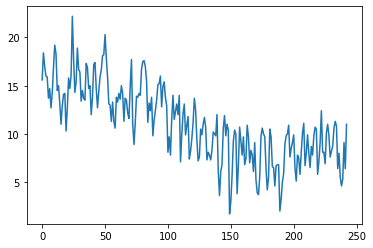

In [ ]:
df["Minimum temperature (°C)"].plot()

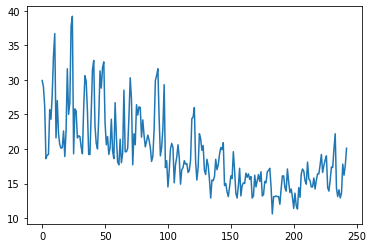

In [ ]:
df["Maximum temperature (°C)"].plot()

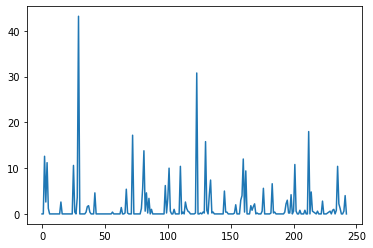

In [ ]:
df["Rainfall (mm)"].plot()

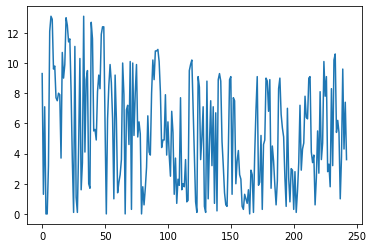

In [ ]:
df["Sunshine (hours)"].plot()

#### Линейная зависимость и корреляционная матрица

$$\Large y_i = a_0 + a_1 x_i + \epsilon_i$$

- $y_i$  - зависимая переменная (отклик)
- $x_i$ - значение числового признака
- $a_0$ и $a_1$ - параметры модели (свободный член и угловой коэффициент)
- $\epsilon_i​$ - случайная ошибка

Для простоты примем, что $x_0 = 1$. Тогда в общем случае форма линейной регрессии выглядит следующим так:
$$\Large \begin{array}{rcl}  R\left(\vec{x}\right) = a_0 x_0 + a_1 x_1 + a_2 x_2 + \cdots + a_m x_m \\ = \sum_{i=0}^m a_i x_i = \vec{x}^T \vec{a} \end{array}
$$
 
​	

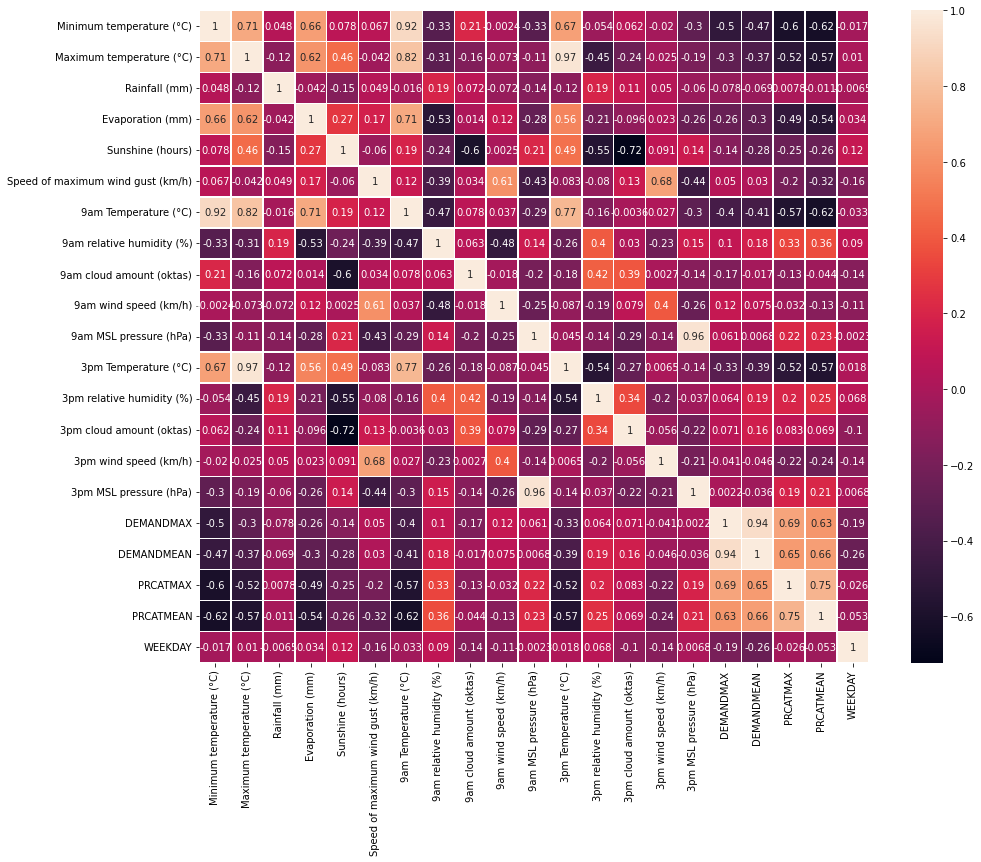

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(15,12))

corr_matrix = sns.heatmap(df.corr(), linewidths=.5, cbar=True, annot=True, ax=ax)

### Предсказание потребления энергии. Регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Рассмотрим пример линейно зависимых признаков

In [ ]:
X = df[["Minimum temperature (°C)"]].values
y = df["PRCATMEAN"].values

# 1. Обучение
linear_regressor = LinearRegression().fit(X, y)

# 2. Предсказание
y_pred = linear_regressor.predict(X)
print('Coef: {:.2f}'.format(linear_regressor.coef_[0]))
print('Intercept: {:.2f}'.format(linear_regressor.intercept_))

Coef: -0.08
Intercept: 2.36


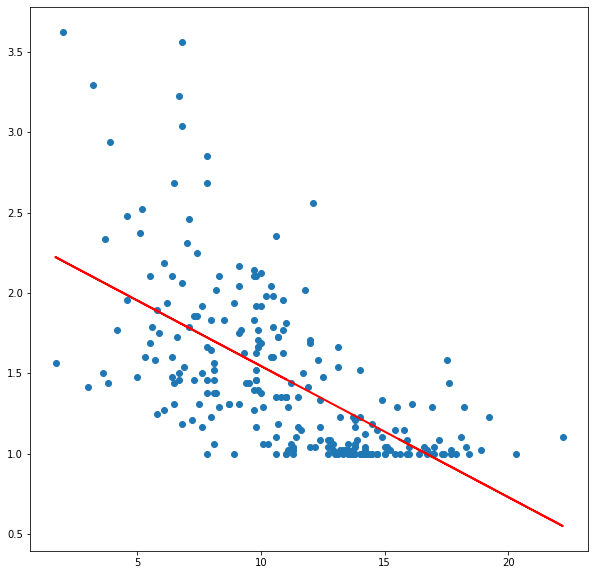

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X, y)
ax.plot(X, linear_regressor.predict(X), color='red', linewidth=2);

Также для быстрой визуализации линейной зависимости можно использовать можно также использовать функцию `regplot` из `seaborn`.

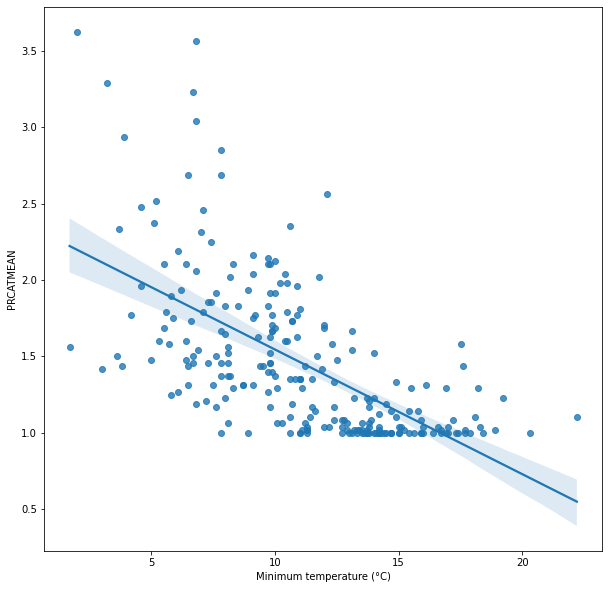

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x="Minimum temperature (°C)", y="PRCATMEAN", data=df)

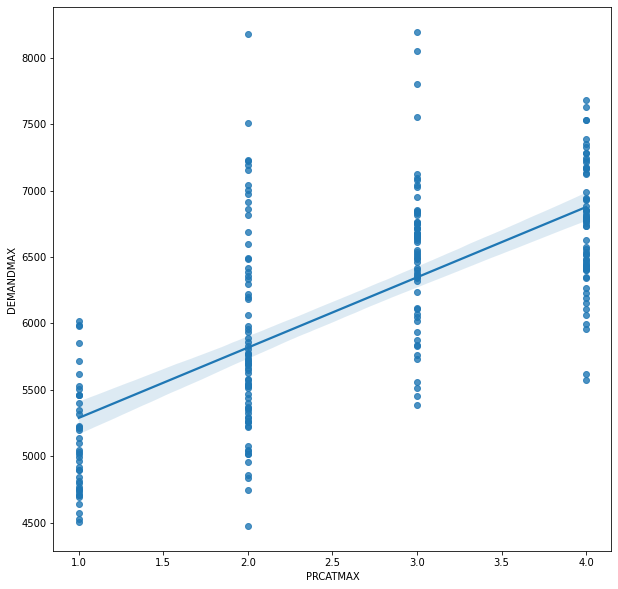

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
sns.regplot(x="PRCATMAX", y="DEMANDMAX", data=df)

Теперь рассмотрим весь датасет

In [ ]:
train_cols = df.columns.difference(["DEMANDMAX", "DEMANDMEAN", "PRCATMAX", "PRCATMEAN"])
X = df[train_cols].values
y = df["DEMANDMAX"].values

# 1. Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 2. Обучение
linear_regressor = LinearRegression().fit(X_train, y_train)

In [ ]:
# 3. Предсказание
y_test_pred = linear_regressor.predict(X_test)
y_train_pred = linear_regressor.predict(X_train)

y_test_pred[:10], y_train_pred[:10]

(array([5922.92958818, 5349.69305535, 6443.67858995, 6162.29658088,
        6747.83681546, 6677.99529523, 6533.0472996 , 7558.52345602,
        5493.87734832, 5989.95765533]),
 array([5008.80530367, 6249.1305815 , 6067.16128626, 6372.80422204,
        5701.98163854, 5391.30169348, 6598.43613046, 5830.37041028,
        5784.38868579, 5898.07698198]))

Нарисуем график связи между остатками модели и предсказанными значениями.

Остаток - это разница между истинным и предсказанным значением.

Такой график называется *Residuals plot*. C его помощью мы можем увидеть нелинейность, выбросы, проверить случайность распределения ошибки.

In [ ]:
# 4. Оценка модели
print('MSE train: {:.3f}, test: {:.3f}'.format(
        mean_squared_error(y_train, y_train_pred),
        mean_squared_error(y_test, y_test_pred)))
print('R^2 train: {:.3f}, test: {:.3f}'.format(
        r2_score(y_train, y_train_pred),
        r2_score(y_test, y_test_pred)))

MSE train: 360836.166, test: 471968.255
R^2 train: 0.457, test: 0.285


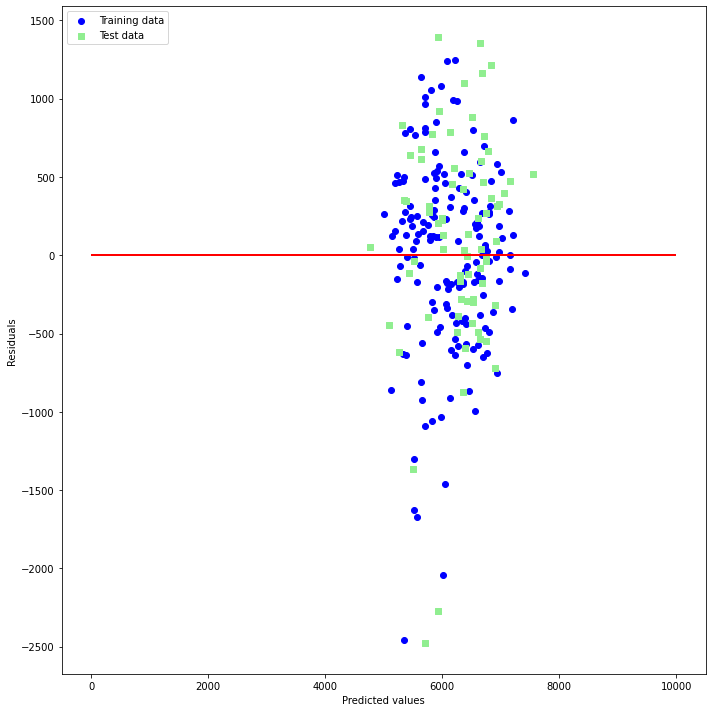

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))

plt.scatter(y_train_pred,  y_train_pred - y_train,
            c='blue', marker='o', label='Training data')
plt.scatter(y_test_pred,  y_test_pred - y_test,
            c='lightgreen', marker='s', label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=0, xmax=10000, lw=2, color='red')
# plt.xlim([-10, 50])
plt.tight_layout()